## Reporter Export of selected products

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Enter years, separated by '%2C'
years = '2016%2C2017%2C2018'
cty_code = 'all'

In [3]:
# Export of the selected product codes
products_df = pd.read_excel("Exporter_of_Selected_Products_code.xlsx", dtype = {'codes':str})
products_dict = products_df.set_index('product group').T.to_dict('list')
products_dict

{'Clothing': [1, 'SITC', 'S4', '84', 'N'],
 'Fur Clothing': [2, 'SITC', 'S4', '84831', 'N'],
 'Complete Watches': [3, 'SITC', 'S4', '8853, 8854', 'Y'],
 'Complete Clocks': [4, 'SITC', 'S4', '8857', 'Y'],
 'Hair Dressing Apparatus': [5, 'SITC', 'S4', '77583', 'N'],
 'Telephones and Mobile Phones': [6, 'SITC', 'S4', '76411', 'N'],
 'Sound Recording Apparatus': [7, 'HS', 'H4', '8519, 8520', 'N'],
 'Video Recording Apparatus': [8, 'HS', 'H4', '852190', 'N'],
 'Computer Parts & Accessories': [9, 'HS', 'H4', '8473', 'N'],
 'Computers (incl. Tablet)': [10, 'HS', 'H4', '8471', 'N'],
 'Video Cameras': [11, 'HS', 'H4', '852540, 852580', 'N'],
 'Electric Micro Motors': [12, 'HS', 'H4', '850110', 'N'],
 'Electronic ICs': [13, 'HS', 'H4', '8542', 'N'],
 'Imitation Jewellery': [14, 'SITC', 'S4', '8972', 'N'],
 'Diamond not mounted or set': [15, 'HS ', 'H4', '7102', 'N'],
 'Toys & Games': [16, 'SITC', 'S4', '8942, 8943, 8944', 'N']}

In [4]:
len(products_dict)

16

In [5]:
# As UNcomtrade API use '%2C' string to separate codings
# modify the coding string here
for k, v in products_dict.items():
    v[3] = v[3].replace(', ', '%2C')
products_dict

{'Clothing': [1, 'SITC', 'S4', '84', 'N'],
 'Fur Clothing': [2, 'SITC', 'S4', '84831', 'N'],
 'Complete Watches': [3, 'SITC', 'S4', '8853%2C8854', 'Y'],
 'Complete Clocks': [4, 'SITC', 'S4', '8857', 'Y'],
 'Hair Dressing Apparatus': [5, 'SITC', 'S4', '77583', 'N'],
 'Telephones and Mobile Phones': [6, 'SITC', 'S4', '76411', 'N'],
 'Sound Recording Apparatus': [7, 'HS', 'H4', '8519%2C8520', 'N'],
 'Video Recording Apparatus': [8, 'HS', 'H4', '852190', 'N'],
 'Computer Parts & Accessories': [9, 'HS', 'H4', '8473', 'N'],
 'Computers (incl. Tablet)': [10, 'HS', 'H4', '8471', 'N'],
 'Video Cameras': [11, 'HS', 'H4', '852540%2C852580', 'N'],
 'Electric Micro Motors': [12, 'HS', 'H4', '850110', 'N'],
 'Electronic ICs': [13, 'HS', 'H4', '8542', 'N'],
 'Imitation Jewellery': [14, 'SITC', 'S4', '8972', 'N'],
 'Diamond not mounted or set': [15, 'HS ', 'H4', '7102', 'N'],
 'Toys & Games': [16, 'SITC', 'S4', '8942%2C8943%2C8944', 'N']}

In [6]:
# implement function for downloading data from UNcomtrade website API
def download_data(productsdict=products_dict,periods=years,countrycode=cty_code):
    
    append_dict={}
    for k, v in productsdict.items():
        
        codetype=v[2]
        
        UNcomtrade_link = 'http://comtrade.un.org/api/get?max=5000000&type=C&freq=A&'\
                            f'px={codetype}&'\
                            f'ps={years}&'\
                            f'r={countrycode}&'\
                            'p=0&rg=all&'\
                            f'cc={v[3]}&'\
                            'fmt=csv&head=M'
    
        df = pd.read_csv(UNcomtrade_link, dtype={'cmdCode': str})
        append_dict[k]=df
        
    return append_dict

In [7]:
data_dict = download_data(productsdict=products_dict,periods=years,countrycode=cty_code)

In [8]:
# just have a look on raw data of one industry
data_dict['Clothing']

,pfCode,yr,period,periodDesc,aggrLevel,IsLeaf,rgCode,rgDesc,rtCode,rtTitle,...,qtAltCode,qtAltDesc,TradeQuantity,AltQuantity,NetWeight,GrossWeight,TradeValue,CIFValue,FOBValue,estCode
0,S4,2016,2016,2016,2,0,1,Import,8,Albania,...,NaN,NaN,NaN,NaN,NaN,NaN,233453615,NaN,NaN,0
1,S4,2016,2016,2016,2,0,2,Export,8,Albania,...,NaN,NaN,NaN,NaN,NaN,NaN,423863297,NaN,NaN,0
2,S4,2016,2016,2016,2,0,1,Import,12,Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,468743222,NaN,NaN,0
3,S4,2016,2016,2016,2,0,2,Export,12,Algeria,...,NaN,NaN,NaN,NaN,NaN,NaN,169306,NaN,NaN,0
4,S4,2016,2016,2016,2,0,1,Import,20,Andorra,...,0.0,NaN,NaN,NaN,0.0,NaN,113834833,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,S4,2018,2018,2018,2,0,4,Re-Import,860,Uzbekistan,...,0.0,NaN,NaN,NaN,0.0,NaN,345111,NaN,NaN,0
1099,S4,2018,2018,2018,2,0,1,Import,882,Samoa,...,0.0,NaN,NaN,NaN,NaN,NaN,5031489,NaN,NaN,4
1100,S4,2018,2018,2018,2,0,2,Export,882,Samoa,...,0.0,NaN,NaN,NaN,0.0,NaN,178936,NaN,NaN,4
1101,S4,2018,2018,2018,2,0,1,Import,894,Zambia,...,0.0,NaN,NaN,NaN,0.0,NaN,56644799,NaN,NaN,4


In [9]:
# export raw data to excel
writer = pd.ExcelWriter('Export_industry_rawdata.xlsx', engine='xlsxwriter')
for key, values in data_dict.items(): 
    
    #print(key)
    #print(values)
    values.to_excel(writer, sheet_name=key)
    #print("==========================================================================")
writer.save()
    

In [10]:
# implement function to perform sorting for country ranking
def trade_ranking(data, tradetype='Export',quantity='N'):
    #print(data.head())
    tradedata = data[data['rgDesc'] == tradetype].copy()
    
    # create HK mil column
    tradedata.loc[:,'TradeValue_HKD_Million'] = tradedata.loc[:,'TradeValue'].values*7.8/10**6
    
    # create US mil column
    tradedata.loc[:,'TradeValue_USD_Million'] = tradedata.loc[:,'TradeValue'].values/10**6
    
    # change column names
    tradedata = tradedata.rename(columns={'TradeValue': 'TradeValue_USD_Dollar'})
    
    # create quantity in thousand column
    if quantity=='Y':
        tradedata.loc[:,'quantity(thousand)'] = tradedata.loc[:,'qtAltCode'].values/1000
    
    tradedata_result = tradedata.groupby(['rtTitle','yr','rgDesc']).sum().unstack('yr')
    latest_yr = tradedata_result.columns.levels[1][-1]
    
    if quantity=='Y':
        tradedata_result = tradedata_result[['TradeValue_USD_Dollar','TradeValue_USD_Million','TradeValue_HKD_Million','qtAltCode','quantity(thousand)']]
    else:
        tradedata_result = tradedata_result[['TradeValue_USD_Dollar','TradeValue_USD_Million','TradeValue_HKD_Million']]
        
    tradedata_result.sort_values([('TradeValue_HKD_Million', latest_yr)], ascending=False, inplace = True)
    return tradedata_result

In [11]:
def trade_result(datadict, tradetype='Export'):
    append_dict={}
    for k,v in datadict.items():
        append_dict[k]=trade_ranking(v,tradetype,quantity=products_dict[k][3])
    return append_dict

In [12]:
result = trade_result(data_dict, tradetype='Export')

In [13]:
# have a look on one selected product category
result['Clothing']

TradeValue_USD_Dollar                              \
yr                                   2016          2017          2018   
rtTitle      rgDesc                                                     
China        Export          1.581795e+11  1.574639e+11  1.582120e+11   
Viet Nam     Export          2.300495e+10  2.503698e+10  2.889634e+10   
Italy        Export          2.190384e+10  2.351417e+10  2.572079e+10   
Germany      Export          1.818942e+10  2.204369e+10  2.535744e+10   
India        Export          1.793159e+10  1.831300e+10  1.655207e+10   
...                                   ...           ...           ...   
Sierra Leone Export          5.851670e+05  2.310800e+04           NaN   
Sri Lanka    Export          4.828022e+09  4.987537e+09           NaN   
Sudan        Export          1.444460e+05  3.332000e+03           NaN   
Togo         Export          7.008520e+05  6.593500e+05           NaN   
Tunisia      Export          2.162725e+09  2.252297e+09           NaN   

                    TradeValue_USD_Million                                \
yr                                    2016           2017           2018   
rtTitle      rgDesc                                                        
China        Export          158179.545734  157463.891686  158211.961546   
Viet Nam     Export           23004.954398   25036.984836   28896.344586   
Italy        Export           21903.839941   23514.171675   25720.794431   
Germany      Export           18189.416381   22043.688963   25357.438331   
India        Export           17931.592028   18312.997290   16552.065756   
...                                    ...            ...            ...   
Sierra Leone Export               0.585167       0.023108            NaN   
Sri Lanka    Export            4828.022378    4987.537440            NaN   
Sudan        Export               0.144446       0.003332            NaN   
Togo         Export               0.700852       0.659350            NaN   
Tunisia      Export            2162.725260    2252.296854            NaN   

                    TradeValue_HKD_Million                              
yr                                    2016          2017          2018  
rtTitle      rgDesc                                                     
China        Export           1.233800e+06  1.228218e+06  1.234053e+06  
Viet Nam     Export           1.794386e+05  1.952885e+05  2.253915e+05  
Italy        Export           1.708500e+05  1.834105e+05  2.006222e+05  
Germany      Export           1.418774e+05  1.719408e+05  1.977880e+05  
India        Export           1.398664e+05  1.428414e+05  1.291061e+05  
...                                    ...           ...           ...  
Sierra Leone Export           4.564303e+00  1.802424e-01           NaN  
Sri Lanka    Export           3.765857e+04  3.890279e+04           NaN  
Sudan        Export           1.126679e+00  2.598960e-02           NaN  
Togo         Export           5.466646e+00  5.142930e+00           NaN  
Tunisia      Export           1.686926e+04  1.756792e+04           NaN  

[161 rows x 9 columns]

In [14]:
# export the result to excel format
writer = pd.ExcelWriter('Export_result.xlsx', engine='xlsxwriter')
for key, values in result.items(): 
    values.to_excel(writer, sheet_name=key, freeze_panes=(2,0))
writer.save() 

## Create pie chart for different commodity

In [15]:
list(result.keys())

['Clothing',
 'Fur Clothing',
 'Complete Watches',
 'Complete Clocks',
 'Hair Dressing Apparatus',
 'Telephones and Mobile Phones',
 'Sound Recording Apparatus',
 'Video Recording Apparatus',
 'Computer Parts & Accessories',
 'Computers (incl. Tablet)',
 'Video Cameras',
 'Electric Micro Motors',
 'Electronic ICs',
 'Imitation Jewellery',
 'Diamond not mounted or set',
 'Toys & Games']

In [16]:
# implement function to acquire top 5 country exporter data for each product category
def top5country(data=result, top_number=5):
    datadict={}
    for i, v in enumerate(list(data.keys())):
        export_values_top5 = data[v][('TradeValue_USD_Million', 2018)][:top_number]
        export_values_others = np.sum(data[v][('TradeValue_USD_Million', 2018)][top_number:])
        export_values= export_values_top5.tolist() + [export_values_others] 
        country_top5 = data[v][('TradeValue_USD_Million', 2018)].index.to_frame(index = False)['rtTitle'][:5]
        country_labels = country_top5.tolist()+["Others"]
        datadict[i] = {'product':v,'country_name':country_labels,'values':export_values}
        
    return datadict

In [17]:
industry_data_toplot=top5country()
industry_data_toplot

{0: {'product': 'Clothing',
  'country_name': ['China', 'Viet Nam', 'Italy', 'Germany', 'India', 'Others'],
  'values': [158211.961546,
   28896.344586,
   25720.794431,
   25357.438331,
   16552.065756,
   203140.279708]},
 1: {'product': 'Fur Clothing',
  'country_name': ['China',
   'Italy',
   'Greece',
   'China, Hong Kong SAR',
   'France',
   'Others'],
  'values': [4140.097705,
   389.131495,
   146.213512,
   145.338966,
   123.837609,
   453.74583899999993]},
 2: {'product': 'Complete Watches',
  'country_name': ['Switzerland',
   'China, Hong Kong SAR',
   'China',
   'France',
   'Germany',
   'Others'],
  'values': [20435.420848,
   5686.887283,
   2284.3514069999997,
   2194.13458,
   1736.811055,
   9478.771800999999]},
 3: {'product': 'Complete Clocks',
  'country_name': ['China',
   'Germany',
   'China, Hong Kong SAR',
   'Switzerland',
   'France',
   'Others'],
  'values': [784.445451,
   101.931583,
   92.809267,
   80.891015,
   74.020745,
   385.040631]},
 4: {'p

In [18]:
plt.rcParams['figure.figsize'] = [50, 25]

In [19]:
plt.rcParams.update({"axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

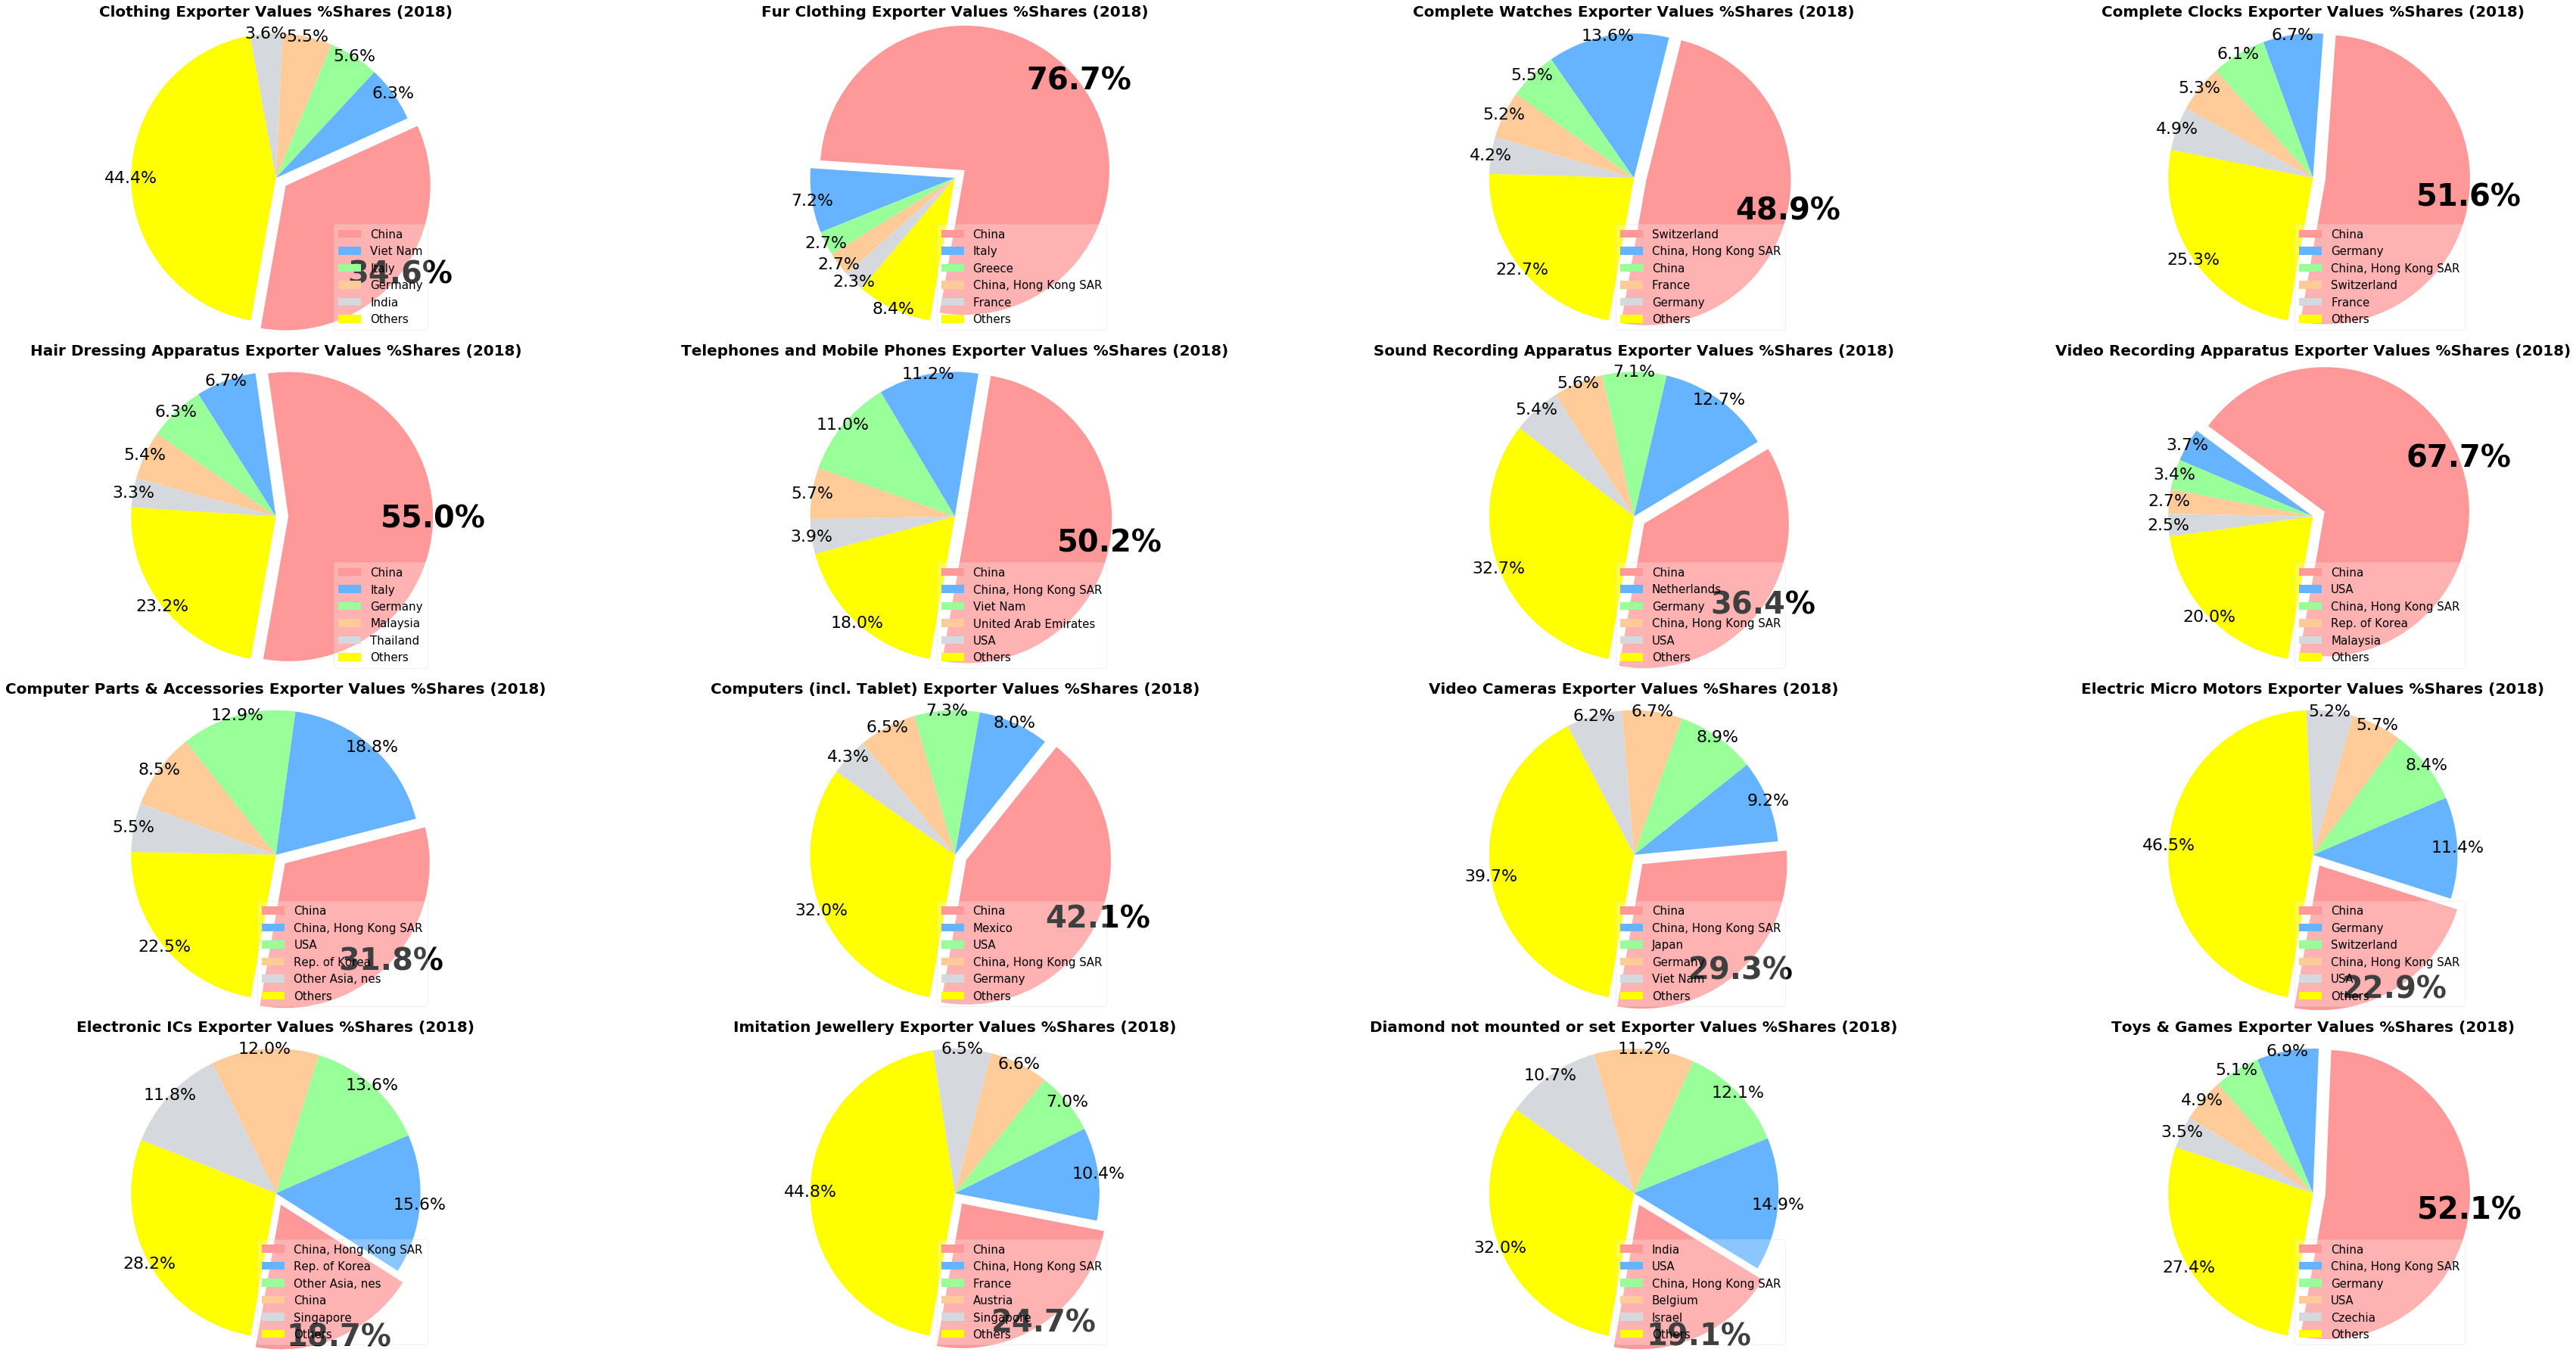

In [20]:
# plot pie charts for 16 product category
fig, axes= plt.subplots(4, 4)
fig.tight_layout()
#fig.subplots_adjust(top=0.8)

for i, ax in enumerate(axes.flatten()):
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#D5D8DC','#FFFF00']
    explode = (0.1, 0, 0, 0, 0, 0)
    wedges, labels, autotexts = ax.pie(industry_data_toplot[i]['values'],              
                       colors=colors, pctdistance=1, explode=explode,
                       radius = 1.15, autopct="%.1f%%", startangle=-100)
    
    for j, t in enumerate(autotexts):
        if j ==0:
            plt.setp(t, fontsize=40,fontweight="bold")
        else:
            plt.setp(t, fontsize=22)
    
    ax.set_title(f"{industry_data_toplot[i]['product']} Exporter Values %Shares (2018)",fontweight="bold", size=20)
    
    ax.legend(industry_data_toplot[i]['country_name'], loc = 'lower right', prop={'size': 15},fontsize='xx-large',framealpha=0.25)
fig.savefig('Exporter_ranking.png',bbox_inches='tight')
plt.show()